In [1]:
import pickle
import pandas as pd

pd.set_option("display.max_colwidth", 100)

engine = "text-davinci-002"
engine_folder_name = f"gpt3_{engine.split('-')[1]}{engine.split('-')[2]}"
path = f"../output/{engine_folder_name}-fs5/{engine_folder_name}-fs5-test"
path_stats = f"../output/stats/{engine_folder_name}-fs5/{engine_folder_name}-fs5-test"
path_figures = f"../figures/{engine_folder_name}-fs5/{engine_folder_name}-fs5"

percentage_filtered_ylim = 0.4

cmap = "viridis"

In [2]:
answers_dict = []
count_dict = []

with open(f"{path}-query_dict.pkl", "rb") as f:
    query_dict_test = pickle.load(f)

for query_id in query_dict_test.keys():
    with open(f"{path_stats}-{query_id}-answers_dict.pkl", "rb") as f:
        answers_dict.append(pickle.load(f))
    with open(f"{path_stats}-{query_id}-count_dict.pkl", "rb") as f:
        count_dict.append(pickle.load(f))

# add keys to count_dict
keys = ["boolean", "date", "number", "literal", "empty", "error", "uri"]
for i in range(len(count_dict)):
    for key in keys:
        if key not in count_dict[i].keys():
            count_dict[i][key] = 0
# sort count_dict by keys
for i in range(len(count_dict)):
    count_dict[i] = {k: count_dict[i][k] for k in keys}
count_dict

[{'boolean': 4,
  'date': 7,
  'number': 11,
  'literal': 9,
  'empty': 94,
  'error': 1,
  'uri': 24},
 {'boolean': 4,
  'date': 8,
  'number': 12,
  'literal': 9,
  'empty': 88,
  'error': 2,
  'uri': 27},
 {'boolean': 4,
  'date': 8,
  'number': 11,
  'literal': 10,
  'empty': 92,
  'error': 1,
  'uri': 24},
 {'boolean': 4,
  'date': 9,
  'number': 11,
  'literal': 9,
  'empty': 90,
  'error': 2,
  'uri': 25},
 {'boolean': 4,
  'date': 8,
  'number': 9,
  'literal': 9,
  'empty': 92,
  'error': 1,
  'uri': 27}]

In [3]:
count_df = pd.DataFrame([], columns=query_dict_test.keys())
for i, query_id in enumerate(query_dict_test.keys()):
    aux_df = pd.DataFrame.from_dict(count_dict[i], orient="index", columns=["count"])
    aux_df = aux_df.sort_values(by=["count"], ascending=False)
    count_df[query_id] = aux_df["count"]
# sort by index
count_df = count_df.sort_index()
# put emptry and error in last rows
empty_error = count_df.loc[["empty", "error"]]
count_df = count_df.drop(["empty", "error"])
count_df = count_df.append(empty_error)
count_df

/var/folders/px/64_j4l_n56x61jstrfywrw4m0000gn/T/ipykernel_1215/2212051822.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_df = count_df.append(empty_error)


,Q1,Q2,Q3,Q4,Q5
boolean,4,4,4,4,4
date,7,8,8,9,8
literal,9,9,10,9,9
number,11,12,11,11,9
uri,24,27,24,25,27
empty,94,88,92,90,92
error,1,2,1,2,1


<Figure size 1000x1000 with 0 Axes>

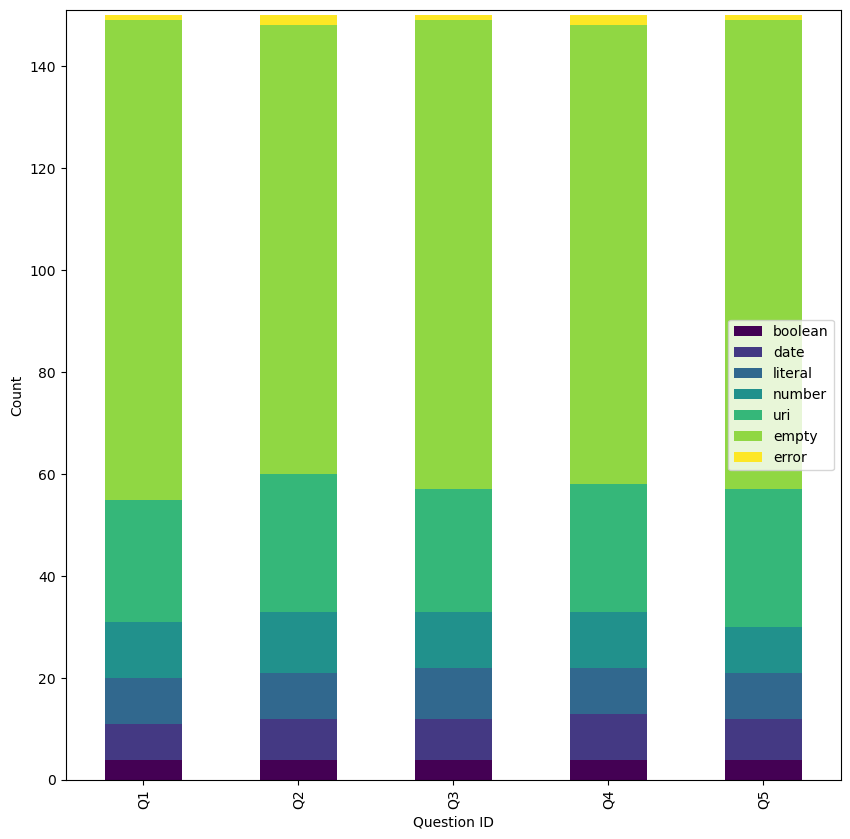

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# stacked bar plot
count_df.T.plot.bar(stacked=True, figsize=(10, 10), cmap=cmap)
plt.ylim(0, sum(count_dict[0].values()) + 1)
plt.ylabel("Count")
plt.xlabel("Question ID")
plt.savefig(
    f"{path_figures}-stacked_bar_all.png", bbox_inches="tight", dpi=300, pad_inches=0
)
plt.show()

<Figure size 1000x1000 with 0 Axes>

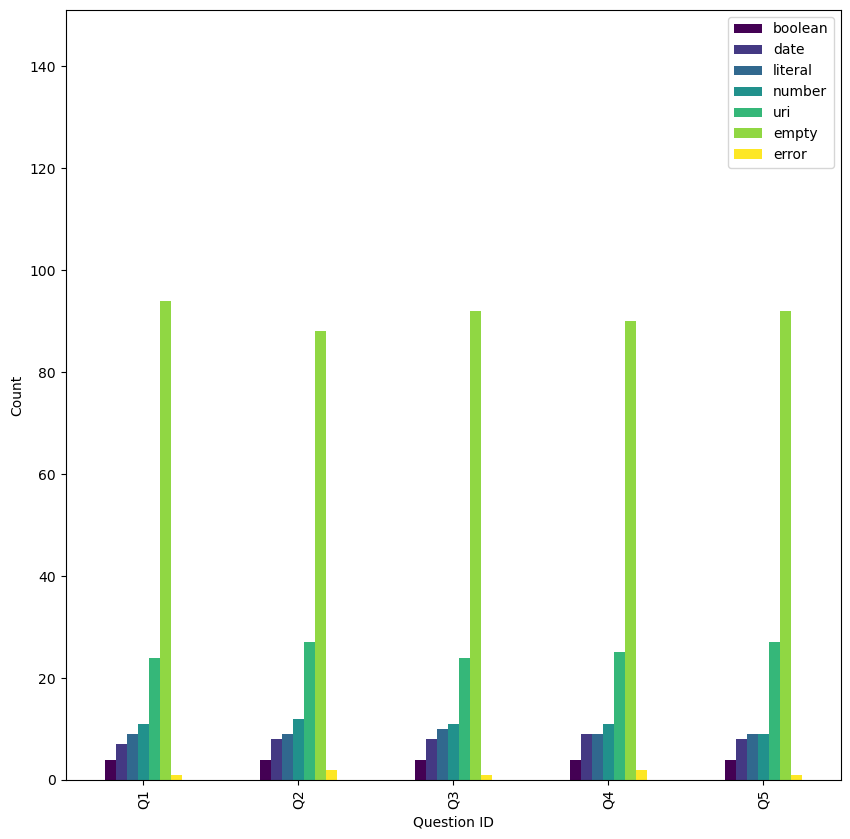

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# grouped bar plot
count_df.T.plot.bar(figsize=(10, 10), cmap=cmap)
plt.ylim(0, sum(count_dict[0].values()) + 1)
plt.ylabel("Count")
plt.xlabel("Question ID")
plt.savefig(
    f"{path_figures}-grouped_bar_all.png", bbox_inches="tight", dpi=300, pad_inches=0
)
plt.show()

<Figure size 1000x1000 with 0 Axes>

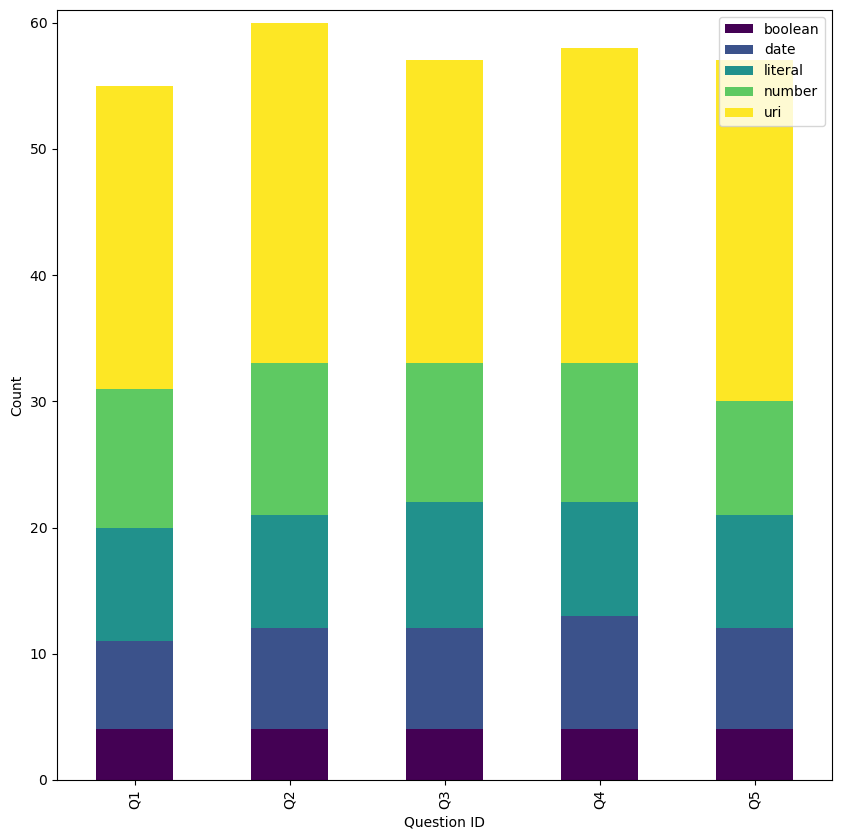

In [6]:
import matplotlib.pyplot as plt

# count_df without error and empty
count_df_filtered = count_df.drop(["error", "empty"], axis=0)

plt.figure(figsize=(10, 10))
# stacked bar plot
count_df_filtered.T.plot.bar(stacked=True, figsize=(10, 10), cmap=cmap)
plt.ylim(0, percentage_filtered_ylim * sum(count_dict[0].values()) + 1)
plt.ylabel("Count")
plt.xlabel("Question ID")
plt.savefig(
    f"{path_figures}-stacked_bar_filtered.png",
    bbox_inches="tight",
    dpi=300,
    pad_inches=0,
)
plt.show()

<Figure size 1000x1000 with 0 Axes>

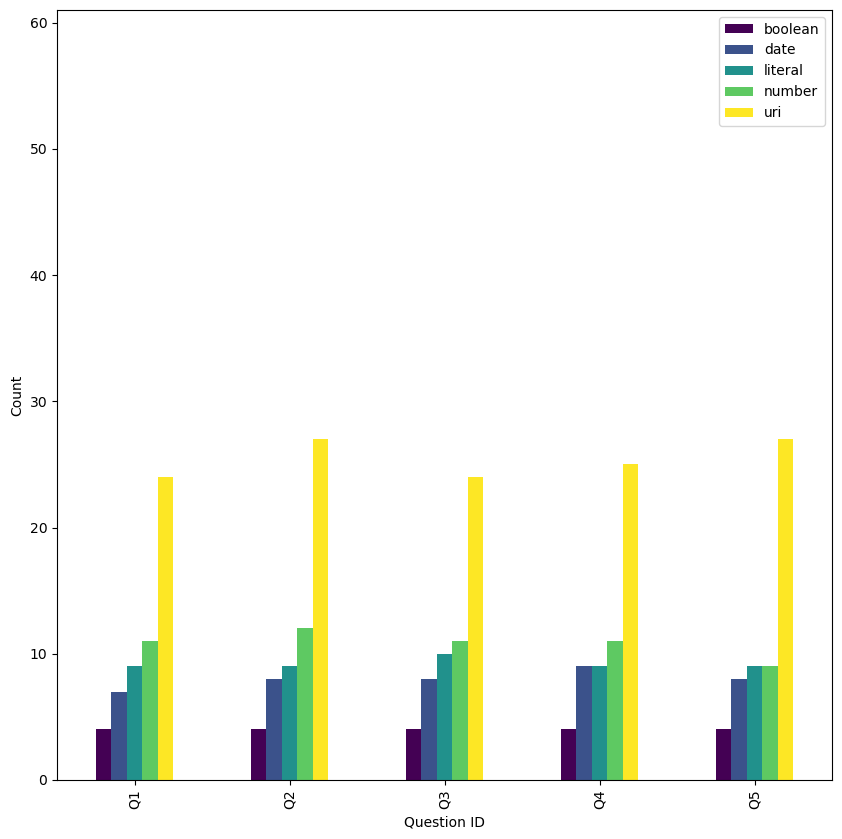

In [7]:
import matplotlib.pyplot as plt

# count_df without error and empty
count_df_filtered = count_df.drop(["error", "empty"], axis=0)

plt.figure(figsize=(10, 10))
# grouped bar plot
count_df_filtered.T.plot.bar(figsize=(10, 10), cmap=cmap)
plt.ylim(0, percentage_filtered_ylim * sum(count_dict[0].values()) + 1)
plt.ylabel("Count")
plt.xlabel("Question ID")
plt.savefig(
    f"{path_figures}-grouped_bar_filtered.png",
    bbox_inches="tight",
    dpi=300,
    pad_inches=0,
)
plt.show()